### CNN(Convolutional Neural Network), 합성곱 신경망
- 실제 이미지 데이터는 분류 대상이 이미지에서 고정된 위치에 있지 않고 분류 대상이 이미지의 어디에 있을지 모르는 경우가 대부분이다.  
- 실제 이미지 데이터를 분류하기 위해서는, 이미지의 각 feature들을 그대로 학습하는 것이 아닌, CNN으로 패턴을 인식한 뒤 학습해야 한다.

<div style="display: flex; width:70%; margin-bottom: 30px;">
    <div>
        <img src="./images/dogs01.png" width="500" style="margin-left: 20px">
    </div>
    <div>
        <img src="./images/dogs02.png" width="720" style="margin-left: 80px">
    </div>
</div>

- 이미지의 크기가 커질 수록 굉장히 많은 Weight가 필요하기 때문에 분류기에 바로 넣지 않고, 이를 사전에 추출 및 축소해야 한다.
<div style="display: flex; width:70%; margin-top: 10px;">
    <div>
        <img src="./images/tiger.png" width="600" style="margin-left: 0; margin-top: 50px">
    </div>
    <div>
        <img src="./images/tiger_dnn.png" width="700" style="margin-left: 50px">
    </div>
</div>

- CNN은 인간의 시신경 구조를 모방한 기술로서, 이미지의 패턴을 찾을 때 사용한다.
- Feature Extraction을 통해 각 단계를 거치면서, 함축된 이미지 조각으로 분리되고 각 이미지 조각을 통해 이미지의 패턴을 인식할 수 있다.
<img src="./images/cnn01.png" width="700" style="margin-left: 0; margin-bottom: 20px">

- CNN은 분류하기에 적합한 최적의 feature를 추출하고, 최적의 feature를 추출하기 위한 최적의 Weight와 Filter를 계산한다.
<img src="./images/cnn02.png" width="500" style="margin-left: 50px">
---

#### Filter
- 일반적으로 정방 행렬로 구성되어 있으며, 원본 이미지에 슬라이딩 윈도우 알고리즘을 사용하여 순차적으로 새로운 픽셀값을 만들면서 적용한다.
- 보통은 사용자가 목적에 맞는 특정 필터를 스스로 만들거나 기존에 설계된 다양한 필터를 선택하여 이미지에 적용하지만,  
CNN은 최적의 필터 값을 학습을 통해 스스로 최적화 한다.
<img src="./images/filter.png" width="500" style="margin-left: 0;">
<img src="./images/filter.gif" width="400" style="margin-left: -20px; margin-top: -30px; margin-bottom: -50px">

- 필터 하나 당, 이미지의 채널 수 만큼 Kernel이 존재하고, 각 채널에 할당된 필터의 커널을 적용하여 출력 이미지를 생성한다.
- 출력 Feature Map의 개수는 필터의 개수와 동일하다.
<img src="./images/filter_channel.gif" width="500" style="margin-left: -10px">

#### Kernel
- filter 안에 1 ~ n개의 커널이 존재한다. 커널의 개수는 반드시 이미지의 채널 수와 동일해야 한다.
- Kernel Size는 면적(가로x세로)을 의미하며 가로와 세로는 서로 다를 수 있지만 보통은 일치 시킨다.
- Kernel 크기가 크면 클 수록 입력 이미지에서 더 많은 Feature 정보를 가져 올 수 있지만,  
큰 사이즈의 Kernel로 Convolution 연산을 할 경우 훨씬 더 많은 연산량과 파라미터가 필요하다.
<img src="./images/kernel.gif" width="500" style="margin-left: -20px">

#### Filter and Kernel
<img src="./images/filter_kernel01.png" width="500" style="margin-left: 0px">
<img src="./images/filter_kernel02.png" width="500" style="margin-left: 0px">  

#### Stride
- 입력 이미지에 Convolution Filter를 적용할 때 Sliding Window가 이동하는 간격을 의미한다.
- 기본 stride는 1이지만, 2를 적용하면 입력 feature map 대비 출력 feature map의 크기가 대략 절반으로 줄어든다.
- stride를 키우면 feature를 손실할 가능성이 높아지지만, 오히려 불필요한 특성을 제거하는 효과를 가져 올 수 있고 Convolution 연산 속도를 향상 시킨다.
<div style="display: flex; width:70%; margin-top: 10px;">
    <div>
        <img src="./images/stride01.gif" width="600" style="margin-left: 0; margin-top: 0">
    </div>
    <div>
        <img src="./images/stride02.gif" width="600" style="margin-left: 50px">
    </div>
</div>

#### Padding
- Filter를 적용하여 Convolution 연산 수행 시 출력 Feature Map이 입력 Feature Map 대비 계속적으로 작아지는 것을 막기 위해 Padding을 적용한다.
- Filter 적용 전, 입력 Feature Map의 상하좌우 끝에 각각 열과 행을 추가 한 뒤 , 0 값으로 채워, 입력 Feature map 사이즈를 증가 시킨다.
- 출력 이미지의 크기를 그대로 유지하기 위해서 직접 계산할 필요 없이 "same"이라는 값을 통해 입력 이미지의 크기와 동일하게 맞출 수 있다.
<img src="./images/padding.gif" width="600" style="margin-left: 0">

#### Pooling
- Convolution 연산이 적용된 Feature map의 일정 영역 별로 하나의 값을 추출하여 Feature map의 사이즈를 줄인다(sub sampling). 
- 보통은 Convolution -> ReLU activation -> Pooling 순서로 적용한다.
- 비슷한 feature들이 서로 다른 이미지에서 위치가 달라지면서 다르게 해석되는 현상을 중화 시킬 수 있고,  
Feature Map의 크기가 줄어들기 때문에, 연산 성능이 향상된다.
- Max Pooling과 Average Pooling이 있으며, Max Pooling은 중요도가 가장 높은 feature를 추출하고, Average Pooling은 전체를 버무려서 추출한다.
<img src="./images/pooling.gif" width="450" style="margin-left: -30px; margin-top: 20px; margin-bottom: 30px">

#### 🚩 정리
- Stride를 증가시키는 것과 Pooling을 적용하는 것은 출력 Feature Map의 크기를 줄이는데 사용한다.
- Convolution 연산을 진행하면서 Feature Map의 크기를 줄이면, 위치 변화에 따른 feature의 영향도도 줄어서, 오버피팅 감소 등의 장점을 얻을 수 있다.
- Pooling의 경우 특정 위치의 feature값이 손실 되는 이슈 등으로 인하여 최근 Advanced CNN에서는 많이 사용되고 있지 않는다.
- 과거 LeNet, AlexNet, VGG의 경우는 CNN(Stride/Padding) -> Activation -> Pooling으로 이어지는 전형적인 구조를 갖추었으나  
이후 발표되는 논문 등에서 Stride로 Feature Map 크기를 줄이는 것이 Pooling 보다 더 나은 성능을 보인다고 한다.
- ResNet부터 이어지는 최근 CNN에서는 최대한 Pooling을 자제하고 Stride를 이용하여 Network을 구성하는 경향이 강해지고 있다.
- CNN은 Feature Extractor와 Classifier로 구성되어 있다.
<img src="./images/cnn03.png" width="850" style="margin-left: -20px; margin-bottom: 20px;">
- Classifier에서는 Fully Connected Layer의 지나친 연결로 인해 많은 파라미터(Weight)가 생성되므로 오히려 오버 피팅을 가져 올 수 있게 된다.  
- Dropout을 사용해서 Layer간 연결을 줄일 수 있으며 오버 피팅을 방지할 수 있다.
<img src="./images/dropout.png" width="850" style="margin: 20px; margin-left: -10px;">

In [2]:
import numpy as np
import pandas as pd
import os

##### Conv2D

In [3]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

INPUT_SIZE = 28

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))
x = Conv2D(filters=4, kernel_size=(3, 3), strides=(1, 1), padding="same", activation='relu')(input_tensor)
print(type(x), x, sep='\n')

<class 'keras.src.engine.keras_tensor.KerasTensor'>
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 4), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")


##### Pooling

In [4]:
input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))
x = Conv2D(filters=12, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
# MaxPooling에 전달한 수로 기존 px을 나누면 최종 px이 나온다.
x = MaxPooling2D((3, 3))(x)
print(type(x), x, sep='\n')

<class 'keras.src.engine.keras_tensor.KerasTensor'>
KerasTensor(type_spec=TensorSpec(shape=(None, 9, 9, 12), dtype=tf.float32, name=None), name='max_pooling2d/MaxPool:0', description="created by layer 'max_pooling2d'")


##### CNN

In [6]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

INPUT_SIZE = 28

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))

# Input * kernel * filter = param
x = Conv2D(filters=10, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
output = MaxPooling2D(2)(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        5824      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
Total params: 5924 (23.14 KB)
Trainable params: 5924 (23.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
from tensorflow.keras.layers import Dense, Flatten

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dense(100, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 100)               1081700   
                                                           

In [12]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)
    
    return images, targets

def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)
    
    return images, oh_targets

def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)
    
    train_train_images, validation_images, train_train_oh_targets, validation_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)
    
    return (train_train_images, train_train_oh_targets), (validation_images, validation_targets), (test_images, test_oh_targets)

In [16]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

print('before reshape: ', train_images.shape, test_images.shape)

# 채널 수를 꼭 넣어주자!
train_images = np.reshape(train_images, (60000, 28, 28, 1))
test_images = np.reshape(test_images, (10000, 28, 28, 1))

print('after reshape: ', train_images.shape, test_images.shape)

(train_train_images, train_train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets, test_images, test_targets)

print(train_train_images.shape, train_train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

before reshape:  (60000, 28, 28) (10000, 28, 28)
after reshape:  (60000, 28, 28, 1) (10000, 28, 28, 1)
(48000, 28, 28, 1) (48000, 10)
(12000, 28, 28, 1) (12000, 10)
(10000, 28, 28, 1) (10000, 10)


In [18]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [19]:
history = model.fit(x=train_train_images, y=train_train_oh_targets, batch_size=256, epochs=20, validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
188/188 [==============================] - 42s 221ms/step - loss: 0.5281 - acc: 0.8139 - val_loss: 0.3752 - val_acc: 0.8655
Epoch 2/20
188/188 [==============================] - 42s 224ms/step - loss: 0.3160 - acc: 0.8896 - val_loss: 0.2792 - val_acc: 0.9020
Epoch 3/20
188/188 [==============================] - 43s 228ms/step - loss: 0.2610 - acc: 0.9070 - val_loss: 0.2726 - val_acc: 0.9017
Epoch 4/20
188/188 [==============================] - 43s 229ms/step - loss: 0.2275 - acc: 0.9195 - val_loss: 0.2396 - val_acc: 0.9162
Epoch 5/20
188/188 [==============================] - 44s 235ms/step - loss: 0.1987 - acc: 0.9286 - val_loss: 0.2474 - val_acc: 0.9145
Epoch 6/20
188/188 [==============================] - 42s 226ms/step - loss: 0.1746 - acc: 0.9362 - val_loss: 0.2396 - val_acc: 0.9152
Epoch 7/20
188/188 [==============================] - 39s 209ms/step - loss: 0.1536 - acc: 0.9443 - val_loss: 0.2356 - val_acc: 0.9181
Epoch 8/20
188/188 [==============================] - 3

In [20]:
model.evaluate(test_images, test_oh_targets, batch_size=256, verbose=1)

40/40 [==============================] - 1s 32ms/step - loss: 0.4089 - acc: 0.9203


[0.40890249609947205, 0.9203000068664551]

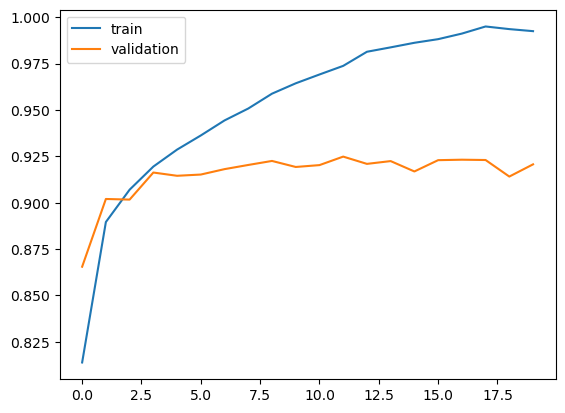

In [21]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()

show_history(history)

##### Dropout

In [28]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

INPUT_SIZE = 28

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(100, activation='relu')(x)
output = Dense(10, activation='softmax')(x)


model = Model(inputs=input_tensor, outputs=output)
model.summary()
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_17 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 10816)             0         
                                                                 
 dropout_4 (Dropout)         (None, 10816)             0         
                                                           

In [29]:
history = model.fit(x=train_train_images, y=train_train_oh_targets, batch_size=256, epochs=20, validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
188/188 [==============================] - 50s 262ms/step - loss: 0.5116 - acc: 0.8184 - val_loss: 0.3320 - val_acc: 0.8820
Epoch 2/20
188/188 [==============================] - 52s 278ms/step - loss: 0.3279 - acc: 0.8826 - val_loss: 0.2762 - val_acc: 0.9023
Epoch 3/20
188/188 [==============================] - 46s 245ms/step - loss: 0.2875 - acc: 0.8964 - val_loss: 0.2712 - val_acc: 0.9003
Epoch 4/20
188/188 [==============================] - 46s 243ms/step - loss: 0.2526 - acc: 0.9091 - val_loss: 0.2461 - val_acc: 0.9107
Epoch 5/20
188/188 [==============================] - 45s 238ms/step - loss: 0.2270 - acc: 0.9172 - val_loss: 0.2247 - val_acc: 0.9203
Epoch 6/20
188/188 [==============================] - 47s 250ms/step - loss: 0.2061 - acc: 0.9239 - val_loss: 0.2160 - val_acc: 0.9231
Epoch 7/20
188/188 [==============================] - 45s 237ms/step - loss: 0.1884 - acc: 0.9306 - val_loss: 0.2218 - val_acc: 0.9200
Epoch 8/20
188/188 [==============================] - 4

In [30]:
model.evaluate(test_images, test_oh_targets, batch_size=256, verbose=1)

40/40 [==============================] - 2s 42ms/step - loss: 0.2614 - acc: 0.9256


[0.2613968849182129, 0.925599992275238]

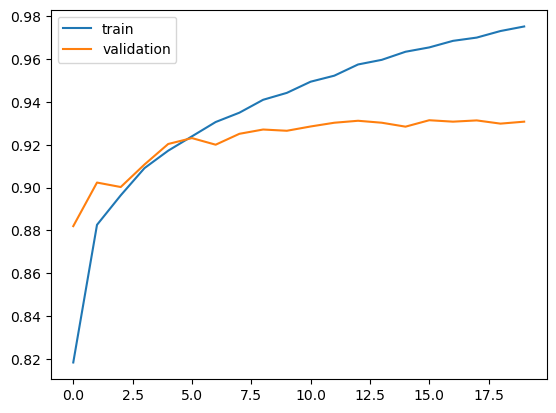

In [31]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()

show_history(history)